<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM2/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SHILADITYA (2348556)

In [417]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import random
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as pt

In [418]:
def r2(actual: np.ndarray, predicted: np.ndarray):
  """ R2 Score """
  return r2_score(actual, predicted)
def adjr2(model, x: np.ndarray, y: np.ndarray):
  """ Adjusted R2 Score """
  return 1 - ( 1-model.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )

In [419]:
graph = []

In [420]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/sem2/datasets/prog5.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [421]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [422]:
df.dropna(inplace=True)

In [423]:
x = df['CREA']
y = df['PROT']

In [424]:
x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()

In [425]:
def permulit(x, y, test_size=0.2, random_seed=None):
  '''
    Split the dataset into training and testing sets.
    Parameters:
    - x: Features (list, array, or DataFrame)
    - y: Labels (list, array, or Series)
    - test_size: The proportion of the dataset to include in the test split (default is 0.2)
    - random_seed: Seed for random number generation to ensure reproducibility (default is None)

    Returns:
    - x_train, y_train, x_test, y_test
  '''
  assert len(x) == len(y),\
  'Input arrays x and y must have the same length (:'
  assert 0 < test_size < 1,\
  'test_size percentage should be a float between 0 and 1.'
  if random_seed:
    random.seed(random_seed)
  combined_data = list(zip(x, y))
  random.shuffle(combined_data)
  x_shuffled, y_shuffled = zip(*combined_data)
  split_index = int(len(x) * (1 - test_size))
  x_train, x_test = x_shuffled[:split_index], x_shuffled[split_index:]
  y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]
  return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [426]:
pd.Series([vif(df[['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT']].values, i) for i in range(df[['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT']].shape[1])], index=df[['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT']].columns)

ALB     31.162740
ALP     10.024253
ALT      3.184002
AST      2.938453
BIL      1.678633
CHE     22.397373
CHOL    27.238712
CREA     3.656226
GGT      2.542260
dtype: float64

In [427]:
x_train, y_train, x_test, y_test = permulit(x,y,test_size=0.2)

##LINEAR REGRESSION

In [428]:
model = linear_model.LinearRegression()
model.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))
y_pred = model.predict(x_test.reshape(-1,1))

In [429]:
graph.append(mse(y_test, y_pred))
print('The Mean Squared Error using Linear Regression is: ', graph[0])
print('The R-squared Error using Linear Regression is: ', r2(y_test, y_pred))
print('The Adjusted R-squared Error using Linear Regression is: ', adjr2(model, y_test.reshape(-1,1), y_pred))

The Mean Squared Error using Linear Regression is:  1.138809983347248
The R-squared Error using Linear Regression is:  0.0008440460556959906
The Adjusted R-squared Error using Linear Regression is:  -1.9829225567618773


##MUTILPLE LINEAR REGRESSION

In [430]:
from sklearn.model_selection import train_test_split
x = df[['BIL','AST','GGT']]
y = df['PROT']
x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [431]:
graph.append(mse(y_test, y_pred))
print('The Mean Squared Error using Multiple Linear Regression is: ', graph[1])
print('The R-squared Error using Multiple Linear Regression is: ', r2(y_test, y_pred))

The Mean Squared Error using Multiple Linear Regression is:  1.156578161790006
The R-squared Error using Multiple Linear Regression is:  -0.012709973484513748


In [432]:
print('The slope is : ', model.coef_)
print('The y-intercept is : ', model.intercept_)

The slope is :  [-0.04399361  0.05486414 -0.045533  ]
The y-intercept is :  0.026402796431339633


In [433]:
model = LinearRegression()
p = PolynomialFeatures(degree=3, include_bias=True)

In [434]:
x = df['ALB']
y = df['PROT']
x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()
x_train, y_train, x_test, y_test = permulit(x,y,test_size=0.2)

##POLYNOMIAL REGRESSION

In [435]:
def poly():
  for i in range(2,5,1):
    p = PolynomialFeatures(degree=i*2, include_bias=True)
    x_trainP = p.fit_transform(x_train.reshape(-1,1))
    x_testP = p.transform(x_test.reshape(-1,1))
    model.fit(x_trainP, y_train)
    y_pred = model.predict(x_testP)
    print(f'The Mean Squared Error using Polynomial Regression with degree {i*2} is: ', mse(y_test, y_pred))
    print('The slope is : ', model.coef_)
    print('The y-intercept is : ', model.intercept_)

In [436]:
poly()

The Mean Squared Error using Polynomial Regression with degree 4 is:  0.7297981815371481
The slope is :  [ 0.          0.58815632 -0.0657566   0.00221011 -0.00112595]
The y-intercept is :  0.05709751962816847
The Mean Squared Error using Polynomial Regression with degree 6 is:  0.7460669676288559
The slope is :  [ 0.          0.61771566  0.13737962  0.00405993 -0.03113826 -0.0013477
  0.00070895]
The y-intercept is :  -0.02972199112024867
The Mean Squared Error using Polynomial Regression with degree 8 is:  0.7419565290764992
The slope is :  [ 0.00000000e+00  6.49673025e-01  1.49269453e-01 -2.24141974e-02
 -3.61191495e-02  1.49029477e-03  1.08401699e-03 -6.04733959e-05
 -3.67563602e-06]
The y-intercept is :  -0.03381884413624682


In [437]:
graph.append(mse(y_test, y_pred))

##RIDGE REGRESSION

In [438]:
ridge = Ridge()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 35}
-0.6902468262535657


In [439]:
y_pred = ridge_regressor.predict(x_test.reshape(-1,1))
graph.append(mse(y_test.reshape(-1,1), y_pred))
print(f'The Mean Squared Error using Ridge Regression is: ', graph[3])
print(f'The R-squared error using Ridge Regression is: ', r2(y_test, y_pred))
print(f'The Adjusted R-squared error using Ridge Regression is: ', adjr2(ridge_regressor, y_test.reshape(-1,1), y_pred))

The Mean Squared Error using Ridge Regression is:  0.7454327628185959
The R-squared error using Ridge Regression is:  0.08154257821396604
The Adjusted R-squared error using Ridge Regression is:  -0.2982554660369505


##LASSO REGRESSION

In [440]:
lasso = Lasso()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 35}
-0.6902468262535657


In [441]:
y_pred = lasso_regressor.predict(x_test.reshape(-1,1))
graph.append(mse(y_test.reshape(-1,1), y_pred))
print(f'The Mean Squared Error using Lasso Regression is: ', graph[4])
print(f'The R-squared error using Lasso Regression is: ', r2(y_test, y_pred))
print(f'The Adjusted R-squared error using Lasso Regression is: ', adjr2(lasso_regressor, y_test.reshape(-1,1), y_pred))

The Mean Squared Error using Lasso Regression is:  0.7508259538149966
The R-squared error using Lasso Regression is:  0.07489755730151748
The Adjusted R-squared error using Lasso Regression is:  -0.32955079473864557


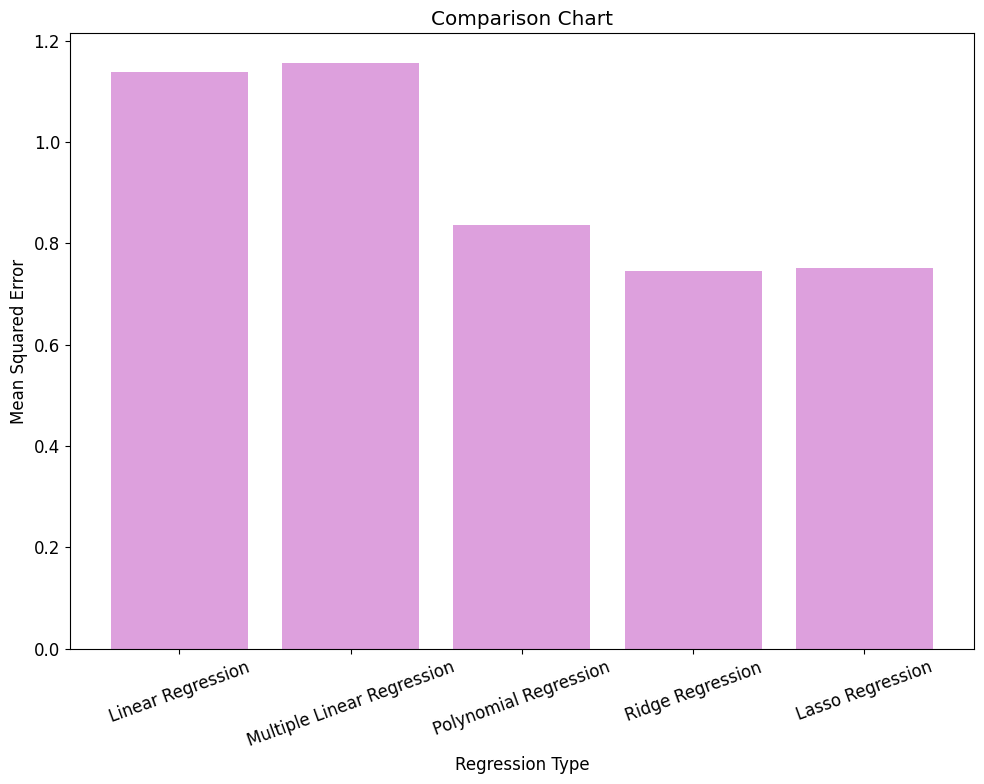

In [442]:
pt.figure(figsize=(10,8))
pt.rcParams.update({'font.size': 12})
pt.bar(['Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression'], graph, color='plum')
pt.title('Comparison Chart')
pt.ylabel('Mean Squared Error')
pt.xlabel('Regression Type')
pt.xticks(rotation=20)
pt.tight_layout();

##INFERENCE
From the above graph, the inference is clear that Ridge regression gives us the least error. The problem with linear regression is as expected. It cannot generalize to handle non-linear relationships. Multiple linear regression gives slightly more error due to choice of predictors. The polynomial regression due to its degree gives considerably good performance. It can handle non linear relationships well. But a high degree in polynomial regression makes the model prone to overfit. That is where the next two regressions come in. Ridge and Lasso are two regularization techniques. They regularize the best fit line so that it can generalize well over unseen data. That is why they perform better on the test data and give much less error. We see that the error value of Ridge is slightly lesser than Lasso. This is because of the way gradient comes out to be on their respective graphs. Ridge assigns a quadratic penalty and Lasso penalizes with respect to the absolute value. What this means in practice is that, Ridge penalizes the well offset values more and thus the bound imposed is tighther than Lasso. Due to this, the error in Ridge is expected to be a little less than Lasso (as observed). But this difference is often very small and thus does not make one superior than the other. Both the regularization techniques compete fairly well in use.

Thank you.